### Load EDA processed Data

In [1]:
### Load EDA processed Data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df =pd.read_csv('eda_processed_adult.csv')

In [2]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Generate Dummies

In [3]:
df_model = df[[ 'age','workclass', 'relationship','educational-num', 'education', 'marital-status', 'occupation', 'race', 'capital-gain', 'capital-loss','gender', 'native-country','hours-per-week','income']]

In [4]:
if 'normalized-losses' in df_model.columns:
	df_model.drop(axis='columns', labels='normalized-losses')
df_model.dropna(axis='index', how="any")

,age,workclass,relationship,educational-num,education,marital-status,occupation,race,capital-gain,capital-loss,gender,native-country,hours-per-week,income
0,25,Private,Own-child,7,11th,Never-married,Machine-op-inspct,Black,0,0,Male,United-States,40,<=50K
1,38,Private,Husband,9,HS-grad,Married-civ-spouse,Farming-fishing,White,0,0,Male,United-States,50,<=50K
2,28,Local-gov,Husband,12,Assoc-acdm,Married-civ-spouse,Protective-serv,White,0,0,Male,United-States,40,>50K
3,44,Private,Husband,10,Some-college,Married-civ-spouse,Machine-op-inspct,Black,7688,0,Male,United-States,40,>50K
5,34,Private,Not-in-family,6,10th,Never-married,Other-service,White,0,0,Male,United-States,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48785,27,Private,Wife,12,Assoc-acdm,Married-civ-spouse,Tech-support,White,0,0,Female,United-States,38,<=50K
48786,40,Private,Husband,9,HS-grad,Married-civ-spouse,Machine-op-inspct,White,0,0,Male,United-States,40,>50K
48787,58,Private,Unmarried,9,HS-grad,Widowed,Adm-clerical,White,0,0,Female,United-States,40,<=50K
48788,22,Private,Own-child,9,HS-grad,Never-married,Adm-clerical,White,0,0,Male,United-States,20,<=50K


In [5]:
df_dum = pd.get_dummies(df_model)
df_dum.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,7,0,0,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,38,9,0,0,50,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,28,12,0,0,40,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,44,10,7688,0,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
4,18,10,0,0,30,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


### Train the model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Split the data into training and testing sets
X = df_dum.drop('income_>50K', axis=1)
y = df_dum['income_>50K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_train_lr = model.predict(X_train)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuaracy_train = accuracy_score(y_train, y_pred_train_lr)
precision = precision_score(y_test, y_pred, average='weighted')
precision_train = precision_score(y_train, y_pred_train_lr, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
recall_train = recall_score(y_train, y_pred_train_lr, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
f1_train = f1_score(y_train, y_pred_train_lr, average='weighted')
confusion_matrix_lr = confusion_matrix(y_test, y_pred)
confusion_matrix_train = confusion_matrix(y_train, y_pred_train_lr)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)
print(f'Logistic Regression Accuracy of test: {accuracy}')
print('Precision is ', precision)
print('Recall is ', recall)
print('F1 is ', f1)
print('Confusion Matrix ', confusion_matrix_lr)
print('Logistic Regression Accuracy of Train set', {accuaracy_train})
print('Precision is ', precision_train)
print('Recall is ', recall_train)
print('F1 is ', f1_train)
print('Confusion Matrix ', confusion_matrix_train)
print('Score Test', model.score(X_train, y_train))
print('Score Train', model.score(X_test, y_test))



Logistic Regression Accuracy of test: 0.9998975199836032
Precision is  0.999897564175072
Recall is  0.9998975199836032
F1 is  0.9998975275900726
Confusion Matrix  [[7439    1]
 [   0 2318]]
Logistic Regression Accuracy of Train set {1.0}
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[29669     0]
 [    0  9363]]
Score Test 1.0
Score Train 0.9998975199836032


### Error Finding

In [7]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


np.float64(-4.912439249060223e-12)

In [8]:
lm_l = Lasso(alpha=.01)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

np.float64(-0.020592533525663387)

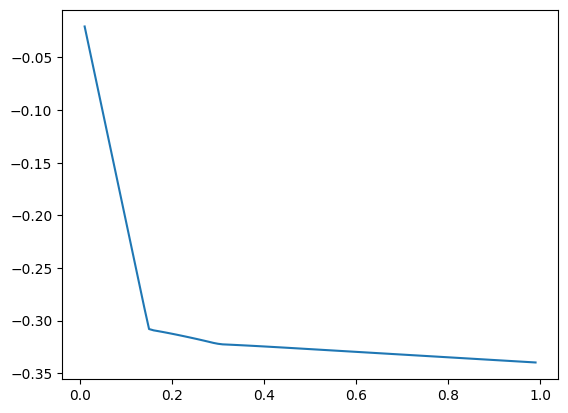

In [9]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
plt.plot(alpha,error)

In [10]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.01,-0.020593


### Multiple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

# Train the multiple linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_mlr = mlr_model.predict(X_test)
y_pred_train_mlr = mlr_model.predict(X_train)

# Convert predictions to binary outcomes
y_pred_mlr_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_mlr]
y_pred_train_mlr_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_train_mlr]

# Calculate the accuracy
accuracy_mlr = accuracy_score(y_test, y_pred_mlr_binary)
accuracy_train_mlr = accuracy_score(y_train, y_pred_train_mlr_binary)
precision_mlr = precision_score(y_test, y_pred_mlr_binary, average='weighted')
precision_train_mlr = precision_score(y_train, y_pred_train_mlr_binary, average='weighted')
recall_mlr = recall_score(y_test, y_pred_mlr_binary, average='weighted')
recall_train_mlr = recall_score(y_train, y_pred_train_mlr_binary, average='weighted')
f1_mlr = f1_score(y_test, y_pred_mlr_binary, average='weighted')
f1_train_mlr = f1_score(y_train, y_pred_train_mlr_binary, average='weighted')
confusion_matrix_mlr = confusion_matrix(y_test, y_pred_mlr_binary)
confusion_matrix_train_mlr = confusion_matrix(y_train, y_pred_train_mlr_binary)
score_test_mlr = mlr_model.score(X_test, y_test)
score_train_mlr = mlr_model.score(X_train, y_train)

print(f'Multiple Linear Regression Accuracy of test: {accuracy_mlr}')
print('Precision is ', precision_mlr)
print('Recall is ', recall_mlr)
print('F1 is ', f1_mlr)
print('Confusion Matrix ', confusion_matrix_mlr)
print('Multiple Linear Regression Accuracy of Train set', accuracy_train_mlr)
print('Precision is ', precision_train_mlr)
print('Recall is ', recall_train_mlr)
print('F1 is ', f1_train_mlr)
print('Confusion Matrix ', confusion_matrix_train_mlr)
print('Score Test', score_test_mlr)
print('Score Train', score_train_mlr)


Multiple Linear Regression Accuracy of test: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[7440    0]
 [   0 2318]]
Multiple Linear Regression Accuracy of Train set 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[29669     0]
 [    0  9363]]
Score Test 1.0
Score Train 1.0


### RandomForestClassifier Model

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=None)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_train_rf = rf_model.predict(X_train)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
precision_train_rf = precision_score(y_train, y_pred_train_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
recall_train_rf = recall_score(y_train, y_pred_train_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
f1_train_rf = f1_score(y_train, y_pred_train_rf, average='weighted')
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_train_rf = confusion_matrix(y_train, y_pred_train_rf)
score_test_rf = rf_model.score(X_test, y_test)
score_train_rf = rf_model.score(X_train, y_train)

print(f'Random Forest Accuracy of test: {accuracy_rf}')
print('Precision is ', precision_rf)
print('Recall is ', recall_rf)
print('F1 is ', f1_rf)
print('Confusion Matrix ', confusion_matrix_rf)
print('Random Forest Accuracy of Train set', accuracy_train_rf)
print('Precision is ', precision_train_rf)
print('Recall is ', recall_train_rf)
print('F1 is ', f1_train_rf)
print('Confusion Matrix ', confusion_matrix_train_rf)
print('Score Test', score_test_rf)
print('Score Train', score_train_rf)


Random Forest Accuracy of test: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[7440    0]
 [   0 2318]]
Random Forest Accuracy of Train set 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[29669     0]
 [    0  9363]]
Score Test 1.0
Score Train 1.0


### Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)
y_pred_train_gb = gb_model.predict(X_train)

# Calculate the accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
precision_train_gb = precision_score(y_train, y_pred_train_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
recall_train_gb = recall_score(y_train, y_pred_train_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
f1_train_gb = f1_score(y_train, y_pred_train_gb, average='weighted')
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)
confusion_matrix_train_gb = confusion_matrix(y_train, y_pred_train_gb)
score_test_gb = gb_model.score(X_test, y_test)
score_train_gb = gb_model.score(X_train, y_train)

print(f'Gradient Boosting Accuracy of test: {accuracy_gb}')
print('Precision is ', precision_gb)
print('Recall is ', recall_gb)
print('F1 is ', f1_gb)
print('Confusion Matrix ', confusion_matrix_gb)
print('Gradient Boosting Accuracy of Train set', accuracy_train_gb)
print('Precision is ', precision_train_gb)
print('Recall is ', recall_train_gb)
print('F1 is ', f1_train_gb)
print('Confusion Matrix ', confusion_matrix_train_gb)
print('Score Test', score_test_gb)
print('Score Train', score_train_gb)

Gradient Boosting Accuracy of test: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[7440    0]
 [   0 2318]]
Gradient Boosting Accuracy of Train set 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[29669     0]
 [    0  9363]]
Score Test 1.0
Score Train 1.0


### Support Vector Machine, K-Nearest Neighbors, and XGBoost

In [10]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Rename columns to remove invalid characters
X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_train.columns]
X_test.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_test.columns]

# Train the SVM model
svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_train_svm = svm_model.predict(X_train)

# Calculate the accuracy, precision, recall, F1 score and confusion matrix for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
score_test_svm = svm_model.score(X_test, y_test)
score_train_svm = svm_model.score(X_train, y_train)
accuaracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
precision_train_svm = precision_score(y_train, y_pred_train_svm, average='weighted')
recall_train_svm = recall_score(y_train, y_pred_train_svm, average='weighted')
f1_train_svm = f1_score(y_train, y_pred_train_svm, average='weighted')

print(f'SVM Accuracy: {accuracy_svm}')
print('Precision is ', precision_svm)
print('Recall is ', recall_svm)
print('F1 is ', f1_svm)
print('Confusion Matrix ', confusion_matrix_svm)
print("Score Train", score_train_svm)
print("Score Test", score_test_svm)
print('Train Precision is ', precision_train_svm)
print('Train Recall is ', recall_train_svm)
print('Train F1 is ', f1_train_svm)
print('Train Accuracy is ', accuaracy_train_svm)

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_train_knn = knn_model.predict(X_train)

# Calculate the accuracy, precision, recall, F1 score and confusion matrix for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
score_test_knn = knn_model.score(X_test, y_test)
score_train_knn = knn_model.score(X_train, y_train)
accuaracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
precision_train_knn = precision_score(y_train, y_pred_train_knn, average='weighted')
recall_train_knn = recall_score(y_train, y_pred_train_knn, average='weighted')
f1_train_knn = f1_score(y_train, y_pred_train_knn, average='weighted')

print(f'KNN Accuracy: {accuracy_knn}')
print('Precision is ', precision_knn)
print('Recall is ', recall_knn)
print('F1 is ', f1_knn)
print('Confusion Matrix ', confusion_matrix_knn)
print("Score Train", score_train_knn)
print("Score Test", score_test_knn)
print('Train Precision is ', precision_train_knn)
print('Train Recall is ', recall_train_knn)
print('Train F1 is ', f1_train_knn)
print('Train Accuracy is ', accuaracy_train_knn)

# Train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_train_xgb = xgb_model.predict(X_train)

# Calculate the accuracy, precision, recall, F1 score and confusion matrix for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
score_test_xgb = xgb_model.score(X_test, y_test)
score_train_xgb = xgb_model.score(X_train, y_train)
precision_train_xgb = precision_score(y_train, y_pred_train_xgb, average='weighted')
recall_train_xgb = recall_score(y_train, y_pred_train_xgb, average='weighted')
f1_train_xgb = f1_score(y_train, y_pred_train_xgb, average='weighted')
accuaracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)

print(f'XGBoost Accuracy: {accuracy_xgb}')
print('Precision is ', precision_xgb)
print('Recall is ', recall_xgb)
print('F1 is ', f1_xgb)
print('Confusion Matrix ', confusion_matrix_xgb)
print("Score Train", score_train_xgb)
print("Score Test", score_test_xgb)
print('Train Precision is ', precision_train_xgb)
print('Train Recall is ', recall_train_xgb)
print('Train F1 is ', f1_train_xgb)
print('Train Accuracy is ', accuaracy_train_xgb)

SVM Accuracy: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[7440    0]
 [   0 2318]]
Score Train 1.0
Score Test 1.0
Train Precision is  1.0
Train Recall is  1.0
Train F1 is  1.0
Train Accuracy is  1.0
KNN Accuracy: 0.929903668784587
Precision is  0.9287588105280152
Recall is  0.929903668784587
F1 is  0.9288477652477695
Confusion Matrix  [[7193  247]
 [ 437 1881]]
Score Train 0.9518087722894035
Score Test 0.929903668784587
Train Precision is  0.9513284772929117
Train Recall is  0.9518087722894035
Train F1 is  0.9512004476890692
Train Accuracy is  0.9518087722894035
XGBoost Accuracy: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[7440    0]
 [   0 2318]]
Score Train 1.0
Score Test 1.0
Train Precision is  1.0
Train Recall is  1.0
Train F1 is  1.0
Train Accuracy is  1.0


### Lasso regression

In [12]:
from sklearn.linear_model import Lasso

# Train the Lasso regression model
lasso_model = Lasso(alpha=0.1, max_iter=1000)
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)
y_pred_train_lasso = lasso_model.predict(X_train)

# Convert predictions to binary outcomes
y_pred_lasso_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_lasso]
y_pred_train_lasso_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_train_lasso]

# Calculate the accuracy
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_binary)
accuracy_train_lasso = accuracy_score(y_train, y_pred_train_lasso_binary)
precision_lasso = precision_score(y_test, y_pred_lasso_binary, average='weighted')
precision_train_lasso = precision_score(y_train, y_pred_train_lasso_binary, average='weighted')
recall_lasso = recall_score(y_test, y_pred_lasso_binary, average='weighted')
recall_train_lasso = recall_score(y_train, y_pred_train_lasso_binary, average='weighted')
f1_lasso = f1_score(y_test, y_pred_lasso_binary, average='weighted')
f1_train_lasso = f1_score(y_train, y_pred_train_lasso_binary, average='weighted')
confusion_matrix_lasso = confusion_matrix(y_test, y_pred_lasso_binary)
confusion_matrix_train_lasso = confusion_matrix(y_train, y_pred_train_lasso_binary)
score_test_lasso = lasso_model.score(X_test, y_test)
score_train_lasso = lasso_model.score(X_train, y_train)

print(f'Lasso Regression Accuracy of test: {accuracy_lasso}')
print('Precision is ', precision_lasso)
print('Recall is ', recall_lasso)
print('F1 is ', f1_lasso)
print('Confusion Matrix ', confusion_matrix_lasso)
print('Lasso Regression Accuracy of Train set', accuracy_train_lasso)
print('Precision is ', precision_train_lasso)
print('Recall is ', recall_train_lasso)
print('F1 is ', f1_train_lasso)
print('Confusion Matrix ', confusion_matrix_train_lasso)
print('Score Test', score_test_lasso)
print('Score Train', score_train_lasso)

Lasso Regression Accuracy of test: 0.9436359909817585
Precision is  0.9471597634736022
Recall is  0.9436359909817585
F1 is  0.9409315715350401
Confusion Matrix  [[7433    7]
 [ 543 1775]]
Lasso Regression Accuracy of Train set 0.9478376716540274
Precision is  0.9509775038328133
Recall is  0.9478376716540274
F1 is  0.9455694423420532
Confusion Matrix  [[29651    18]
 [ 2018  7345]]
Score Test 0.644224846709524
Score Train 0.6462453445363038


### Decision Tree

In [13]:
# Train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=None)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)
y_pred_train_dt = dt_model.predict(X_train)

# Calculate the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
precision_train_dt = precision_score(y_train, y_pred_train_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
recall_train_dt = recall_score(y_train, y_pred_train_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
f1_train_dt = f1_score(y_train, y_pred_train_dt, average='weighted')
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
confusion_matrix_train_dt = confusion_matrix(y_train, y_pred_train_dt)
score_test_dt = dt_model.score(X_test, y_test)
score_train_dt = dt_model.score(X_train, y_train)

print(f'Decision Tree Accuracy of test: {accuracy_dt}')
print('Precision is ', precision_dt)
print('Recall is ', recall_dt)
print('F1 is ', f1_dt)
print('Confusion Matrix ', confusion_matrix_dt)
print('Decision Tree Accuracy of Train set', accuracy_train_dt)
print('Precision is ', precision_train_dt)
print('Recall is ', recall_train_dt)
print('F1 is ', f1_train_dt)
print('Confusion Matrix ', confusion_matrix_train_dt)
print('Score Test', score_test_dt)
print('Score Train', score_train_dt)

Decision Tree Accuracy of test: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[7440    0]
 [   0 2318]]
Decision Tree Accuracy of Train set 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[29669     0]
 [    0  9363]]
Score Test 1.0
Score Train 1.0


In [14]:
# Create a DataFrame to store the models and their metrics
df_metrics = pd.DataFrame({
    'Model': ['Logistic Regression','Multiple Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'XGBoost', 'Lasso Regression', 'Decision Tree'],
    'Accuracy': [accuracy, accuracy_mlr, accuracy_rf, accuracy_gb, accuracy_svm, accuracy_knn, accuracy_xgb, accuracy_lasso, accuracy_dt],
    'Precision': [precision, precision_mlr, precision_rf, precision_gb, precision_svm, precision_knn, precision_xgb, precision_lasso, precision_dt],
    'Recall': [recall, recall_mlr, recall_rf, recall_gb, recall_svm, recall_knn, recall_xgb, recall_lasso, recall_dt],
    'F1 Score': [f1, f1_mlr, f1_rf, f1_gb, f1_svm, f1_knn, f1_xgb, f1_lasso, f1_dt],
    'Train Accuracy': [accuaracy_train, accuracy_train_mlr, accuracy_train_rf, accuracy_train_gb, accuaracy_train_svm,accuaracy_train_knn,accuaracy_train_xgb, accuracy_train_lasso, accuracy_train_dt],
    'Train Precision': [precision_train, precision_train_mlr, precision_train_rf, precision_train_gb, precision_train_svm, precision_train_knn, precision_train_xgb, precision_train_lasso, precision_train_dt],
    'Train Recall': [recall_train, recall_train_mlr, recall_train_rf, recall_train_gb, recall_train_svm, recall_train_knn, recall_train_xgb, recall_train_lasso, recall_train_dt],
    'Train F1 Score': [f1_train, f1_train_mlr, f1_train_rf, f1_train_gb, f1_train_svm, f1_train_knn, f1_train_xgb, f1_train_lasso, f1_train_dt],
    'Score_Train': [score_train, score_train_mlr, score_train_rf, score_train_gb, score_train_svm, score_train_knn, score_train_xgb, score_train_lasso, score_train_dt],
    'Score_Test': [score_test, score_test_mlr, score_test_rf, score_test_gb, score_test_svm, score_test_knn, score_test_xgb, score_test_lasso, score_test_dt],
    'confusion_matrix': [confusion_matrix_lr, confusion_matrix_mlr, confusion_matrix_rf, confusion_matrix_gb, confusion_matrix_svm, confusion_matrix_knn, confusion_matrix_xgb, confusion_matrix_lasso, confusion_matrix_dt],
})
# Display the DataFrame
print(df_metrics)
model_df = df_metrics.set_index('Model')
model_df.to_csv('model_metrics.csv')

                        Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  0.999898   0.999898  0.999898  0.999898   
1  Multiple Linear Regression  1.000000   1.000000  1.000000  1.000000   
2               Random Forest  1.000000   1.000000  1.000000  1.000000   
3           Gradient Boosting  1.000000   1.000000  1.000000  1.000000   
4                         SVM  1.000000   1.000000  1.000000  1.000000   
5                         KNN  0.929904   0.928759  0.929904  0.928848   
6                     XGBoost  1.000000   1.000000  1.000000  1.000000   
7            Lasso Regression  0.943636   0.947160  0.943636  0.940932   
8               Decision Tree  1.000000   1.000000  1.000000  1.000000   

   Train Accuracy  Train Precision  Train Recall  Train F1 Score  Score_Train  \
0        1.000000         1.000000      1.000000        1.000000     1.000000   
1        1.000000         1.000000      1.000000        1.000000     1.000000   
2        1.00000

### Visualization of Model

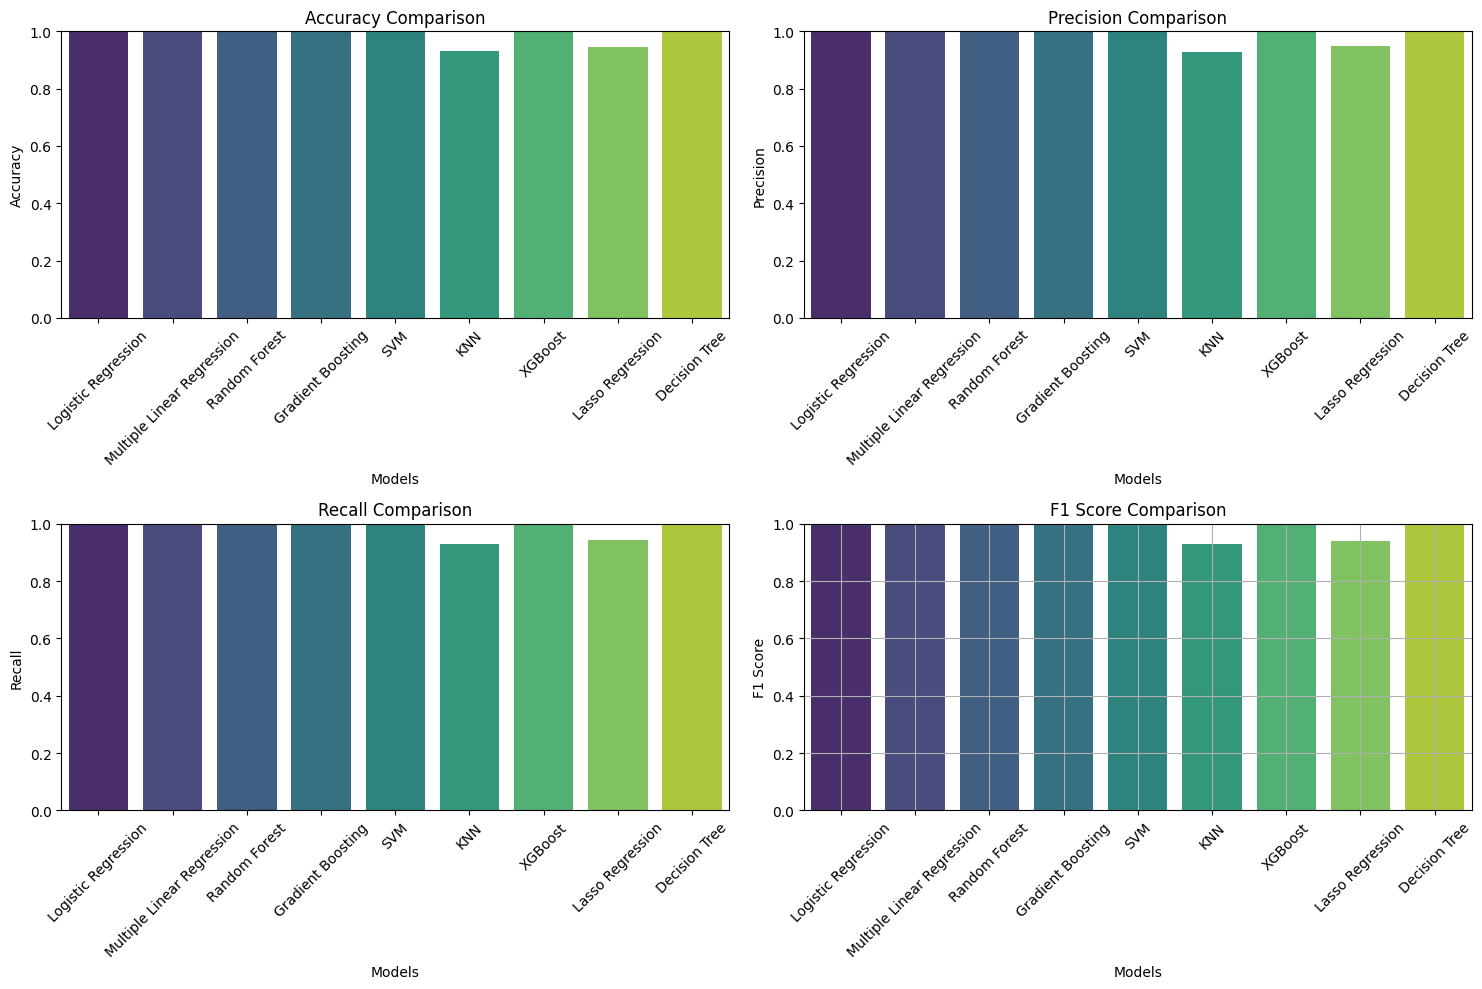

In [15]:
import warnings
import seaborn as sns

# Suppress specific warnings if needed
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

plt.figure(figsize=(15, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(
        x=model_df.index, 
        y=model_df[metric], 
        palette='viridis', 
        hue=model_df.index,  # Assign `x` to `hue`
        dodge=False, 
        legend=False  # Disable legend to avoid clutter
    )
    plt.title(f'{metric} Comparison')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    plt.xlabel('Models')

plt.tight_layout()
plt.grid(True)
plt.show()


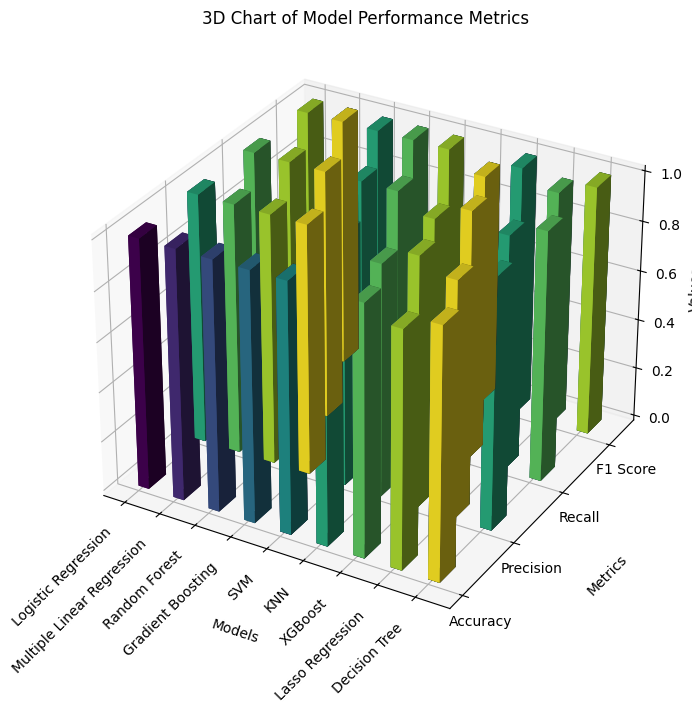

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for the 3D bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the metrics and their corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(model_df.index))  # Model indices
y = np.arange(len(metrics))  # Metric indices
x, y = np.meshgrid(x, y)
x = x.ravel()
y = y.ravel()
z = np.zeros_like(x)  # Base of the bars

# Flatten the values for the 3D bar chart
values = np.array([model_df[metric].values for metric in metrics]).ravel()

# Define the width, depth, and height of the bars
dx = dy = 0.3
dz = values

# Define colors for each model
colors = plt.cm.viridis(np.linspace(0, 1, len(model_df.index)))

# Create the 3D bar chart with different colors for each model
for i in range(len(model_df.index)):
    ax.bar3d(x[i::len(metrics)], y[i::len(metrics)], z[i::len(metrics)], dx, dy, dz[i::len(metrics)], color=colors[i], zsort='average')

# Set the labels and title
ax.set_xlabel('Models', labelpad=20)
ax.set_ylabel('Metrics', labelpad=20)
ax.set_zlabel('Values')
ax.set_xticks(np.arange(len(model_df.index)))
ax.set_xticklabels(model_df.index, rotation=45, ha='right')
ax.set_yticks(np.arange(len(metrics)))
ax.set_yticklabels(metrics)
ax.set_title('3D Chart of Model Performance Metrics')

# Show the plot
plt.show()

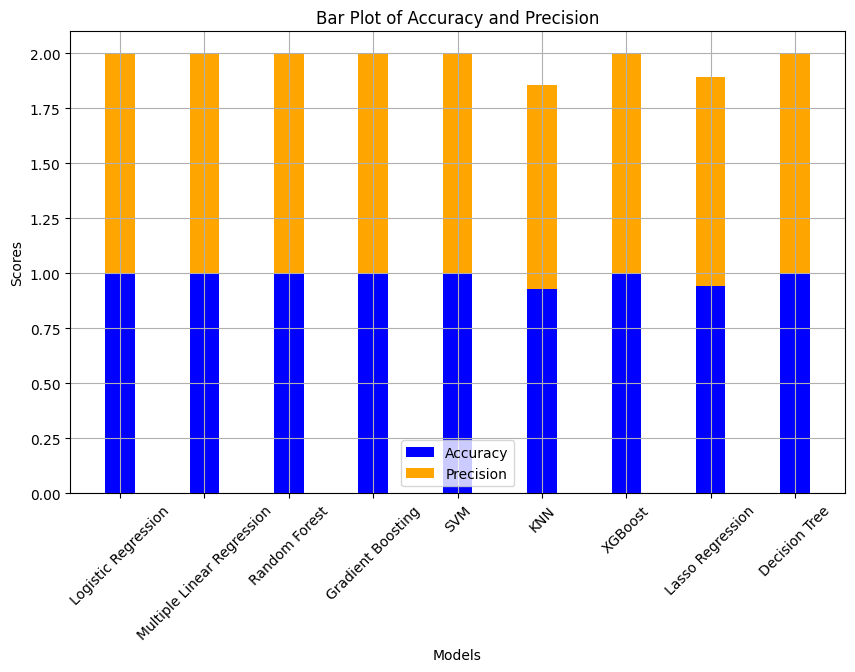

In [17]:
# Create a bar plot for Accuracy and Precision
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # the width of the bars

# Plot Accuracy
ax.bar(df_metrics['Model'], df_metrics['Accuracy'], width, label='Accuracy', color='blue')

# Plot Precision
ax.bar(df_metrics['Model'], df_metrics['Precision'], width, bottom=df_metrics['Accuracy'], label='Precision', color='orange')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Bar Plot of Accuracy and Precision')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Identify Best Model

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Define a smaller parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)

# Initialize the GridSearchCV object with fewer cross-validation folds
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f'Best parameters for Random Forest: {best_params_rf}')
print(f'Best cross-validation accuracy for Random Forest: {best_score_rf}')

#select the best model
best_model = grid_search_rf.best_estimator_

best_model.predict(X_test)

#save the model and scaler
import joblib
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(standard_scaler, 'best_scaler.pkl')
print('Best model and scaler saved to best_model.pkl and best_scaler.pkl')

# save the model columns
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')
pd.DataFrame(model_columns).to_csv('model_columns.csv', index=False)

print('Model columns exported to model_columns.pkl')


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy for Random Forest: 1.0
Best model and scaler saved to best_model.pkl and best_scaler.pkl
Model columns exported to model_columns.pkl


In [18]:
# Define a smaller parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}

# Initialize the GridSearchCV object with fewer cross-validation folds
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_gb, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

standard_scaler_gb = StandardScaler()
X_train_scaled_gb = standard_scaler.fit_transform(X_train)


# Get the best parameters and best score for Gradient Boosting
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

best_model_gb = grid_search_rf.best_estimator_

best_model_gb.predict(X_test)

print(f'Best parameters for Gradient Boosting: {best_params_gb}')
print(f'Best cross-validation accuracy for Gradient Boosting: {best_score_gb}')

#save the model and scaler
import joblib
joblib.dump(best_model_gb, 'GB_model.pkl')
joblib.dump(standard_scaler_gb, 'GBmodel_scaler.pkl')
print('Best model and scaler saved to best_model.pkl and best_scaler.pkl')

# save the model columns
model_columns_gb = list(X.columns)
joblib.dump(model_columns_gb, 'GBmodel_columns.pkl')
pd.DataFrame(model_columns_gb).to_csv('GBmodel_columns.csv', index=False)

print('Model columns exported to model_columns.pkl')

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best cross-validation accuracy for Gradient Boosting: 1.0
Best model and scaler saved to best_model.pkl and best_scaler.pkl
Model columns exported to model_columns.pkl


In [19]:
import pickle
# Save the model to a pickle file
with open('gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)
print("Model has been saved to 'gradient_boosting_model.pkl'.")
# Load the model from the pickle file
with open('gradient_boosting_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model has been loaded successfully.")

Model has been saved to 'gradient_boosting_model.pkl'.
Model has been loaded successfully.


In [34]:
import pickle

# Save the RandomForest model to a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Random Forest model has been saved to 'random_forest_model.pkl'.")

# Load the RandomForest model from the pickle file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

print("Random Forest model has been loaded successfully.")

Random Forest model has been saved to 'random_forest_model.pkl'.
Random Forest model has been loaded successfully.


### Identify Features Prediction

In [35]:
# Get feature importances from the Gradient Boosting model
feature_importance_gb = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

# Print the top 10 most important features from the Gradient Boosting model
print("Top 5 most important features from Gradient Boosting model:")
print(feature_importance_gb.head(5))

Top 5 most important features from Gradient Boosting model:
               feature    importance
104        income_=50K  1.000000e+00
0                  age  1.327778e-13
4       hours-per-week  5.056018e-14
8    workclass_Private  4.303251e-14
30   education_HS-grad  3.670573e-14


In [36]:

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Print top 5 most important features
print("\nTop 5 most important features:")
print(feature_importance.head())


Top 5 most important features:
                               feature  importance
104                        income_=50K    0.655469
2                         capital-gain    0.053063
13                relationship_Husband    0.042862
37   marital-status_Married-civ-spouse    0.038349
1                      educational-num    0.034597


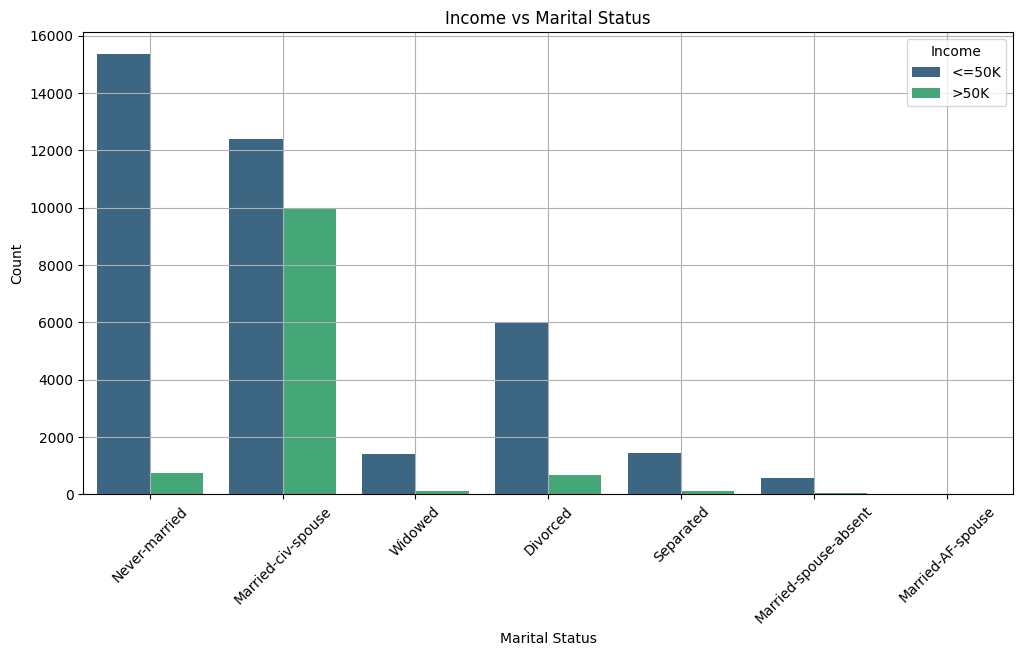

In [59]:
# Create a bar plot for marital status vs income
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='marital-status', hue='income', palette='viridis')
plt.title('Income vs Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.grid(True)
plt.show()

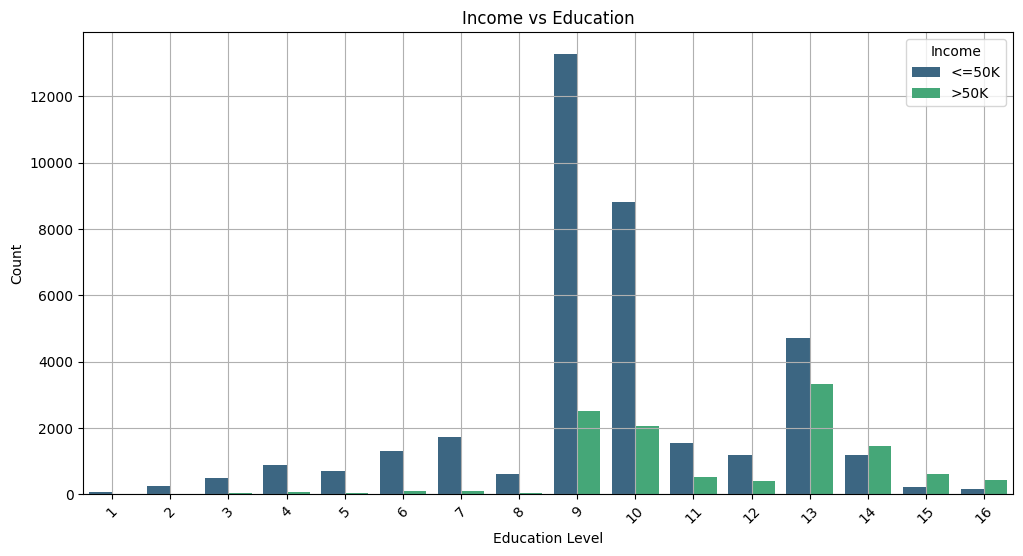

In [39]:
# Create a bar plot for income vs education
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='educational-num', hue='income', palette='viridis')
plt.title('Income vs Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.grid(True)
plt.show()

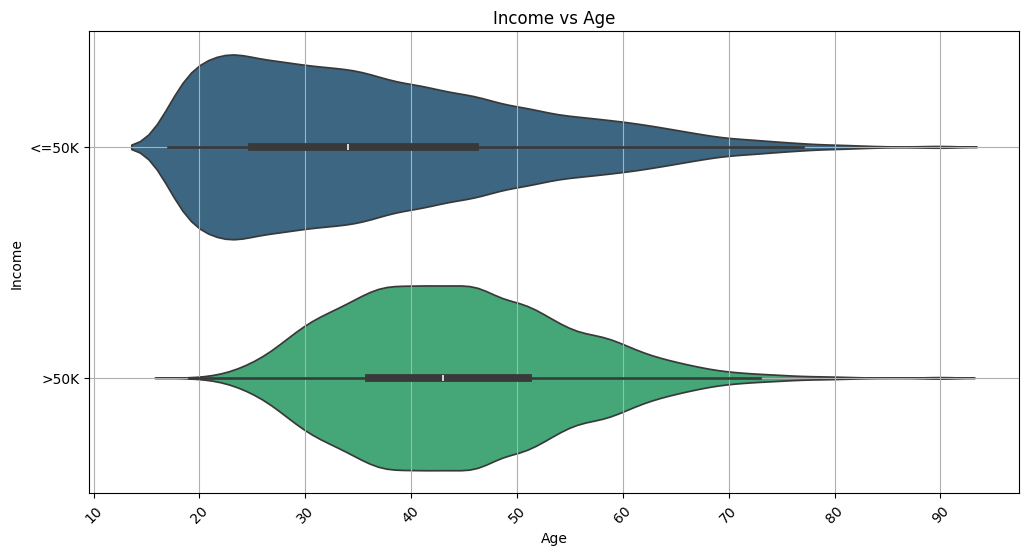

In [42]:
# Create a violin plot for income vs age
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='age', y='income', palette='viridis')
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


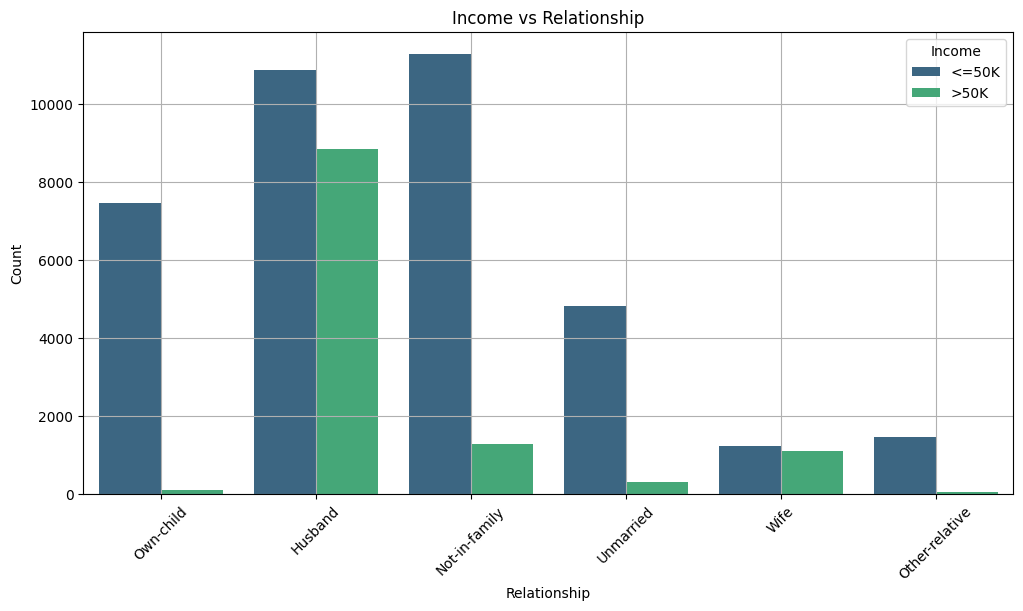

In [43]:
# Create a bar plot for income vs relationship
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='relationship', hue='income', palette='viridis')
plt.title('Income vs Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.grid(True)
plt.show()